In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os
%matplotlib inline

In [65]:
auto = pd.read_pickle('./auto.pkl')

### 1. Box Plot

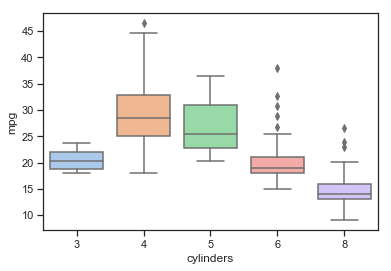

In [66]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="cylinders", y="mpg", data=auto)

### 2. Violon Plot

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


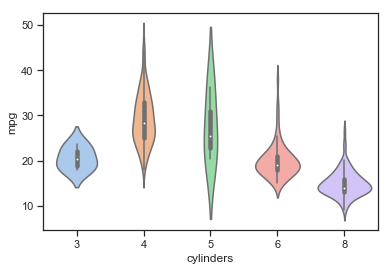

In [67]:
sns.violinplot(x = "cylinders", y="mpg", data=auto)

### 3. Scatter Plot

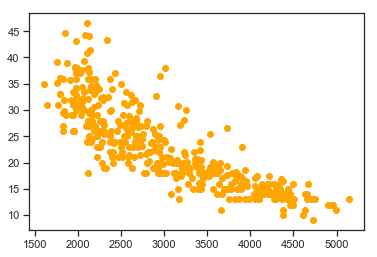

In [68]:
plt.scatter(x = "weight", y="mpg", data=auto, color = 'orange')

### 4. Histogram Plot

[30. 89. 58. 52. 36. 40. 29. 34. 18.  6.]
[1613.  1965.7 2318.4 2671.1 3023.8 3376.5 3729.2 4081.9 4434.6 4787.3
 5140. ]


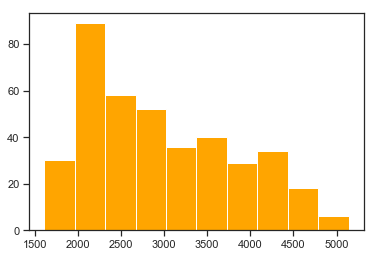

In [69]:
n, bins, patches = plt.hist(x=auto.weight, color= 'orange')
print(n)
print(bins)

### 5. Density Plot

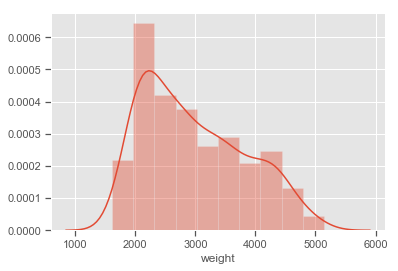

In [93]:
sns.distplot(auto['weight'])

### 6. Bar Plot

In [74]:
df = pd.read_csv('Music Sales.csv', index_col=None)

In [75]:
df_EA=df[df['Region'].isin(['Europe', 'Asia'])].copy()
df_genre = df_EA.groupby(['Genre'])['Quantity'].sum().reset_index()
df_genre.sort_values(by=['Quantity'], ascending=False, inplace=True)

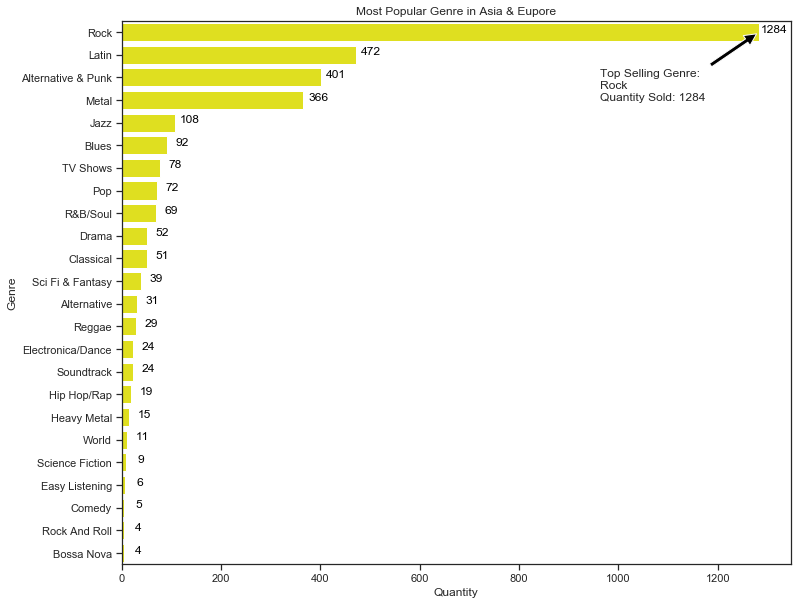

In [76]:
plt.figure(figsize=(12,10))
ax = sns.barplot(x = 'Quantity',y = 'Genre', color = 'yellow', data = df_genre, dodge=False)
plt.title('Most Popular Genre in Asia & Eupore')
plt.ylabel('Genre', fontsize=12)
plt.xlabel('Quantity', fontsize=12)

# add labels
for index, row in zip(range(len(df_genre)),df_genre.iterrows()):
    quantity = row[1]["Quantity"] 
    if index == 0:
        ax.annotate('Top Selling Genre:\n%s\nQuantity Sold: %s' % (row[1]["Genre"], quantity), xy=(quantity, index), xytext=(quantity * 0.75, 3),
            arrowprops=dict(facecolor='black', shrink=0.05))
    ax.text(quantity + 30, index, quantity, color="black", ha="center")

plt.show()

### 7. Stacked Bar Plot

In [77]:
# get the rank of artists by quantity
df_rank = df_EA.groupby(['Artist'])['Quantity'].sum().reset_index()
df_rank['Rank'] = df_rank['Quantity'].rank(method='dense', ascending=False) 
# get the quantity by artists and genre
# append the rank of artists
df_rank_genre = df_EA.groupby(['Artist', 'Genre'])['Quantity'].sum().reset_index()
df_rank_genre=pd.merge(df_rank_genre, df_rank[['Artist', 'Rank']], on='Artist', how='left')
df_rank_genre.sort_values(by='Rank', inplace=True)

In [78]:
df_top20 = df_rank_genre.loc[df_rank_genre['Rank'] <= 20,
                             ['Artist', 'Genre', 'Quantity']].pivot(columns='Genre',
                                                                    index='Artist',
                                                                    values='Quantity')

df_top20['total'] = df_top20.sum(axis=1)
df_top20.sort_values(by=['total'], ascending=[True], inplace=True)
df_top20.drop('total', axis=1, inplace=True)
df_top20_select = df_top20.tail(20)

Text(0.5, 0, 'Quantity')

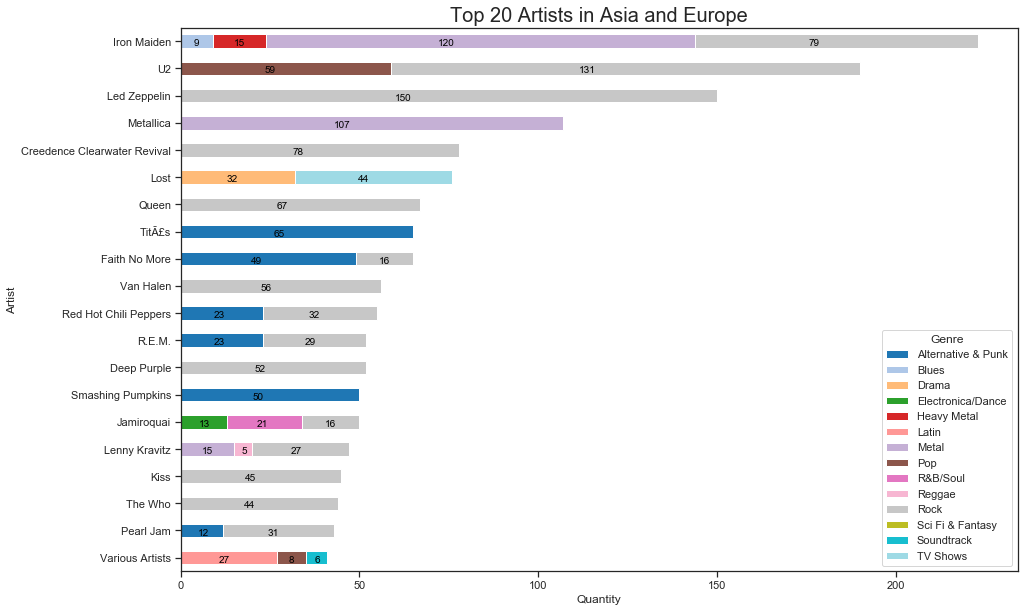

In [79]:
#pal = sns.color_palette("Set1")
ax = df_top20_select.plot.barh(stacked=True, figsize=(15, 10),cmap=plt.cm.get_cmap('tab20'))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if width > 0:
        ax.annotate(f'{width:.0f}', (p.get_x()+0.40*width,
                                     p.get_y()+.17*height), color='black', fontsize=10)
plt.title('Top 20 Artists in Asia and Europe', size=20)
plt.xlabel('Quantity')

### 8. Multi-set Bar Chart

In [80]:
# choose three regions 'Europe', 'South America', and 'North America'
df_subregion=df[df['Region'].isin(['Europe', 'South America','North  America'])].copy()
# sum the 'quantity', group by 'Region' and 'Genre'
df_quantity = df_subregion.groupby(['Region', 'Genre'])['Quantity'].sum().reset_index()
df_quantity.sort_values(by=['Region','Quantity','Genre'], ascending=False, inplace=True)
df_subset = df_quantity.loc[[60,55,56,48,41,36,37,25,17,12,1,13],:]

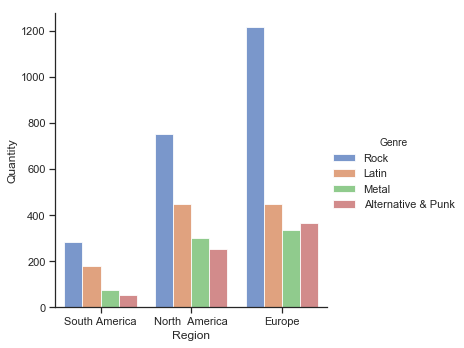

In [81]:
g = sns.catplot(x="Region", y="Quantity", kind = 'bar',hue="Genre", palette="muted", data=df_subset,alpha=.8)

### 9. Line Plot

In [91]:
# format date to month
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate_year_month'] = pd.to_datetime(df['InvoiceDate']).dt.strftime("%Y-%m")
# subset the data needed for the plot
df_3genres=df[df['Genre'].isin(['Alternative & Punk','Heavy Metal', 'Rock'])]
# get the summary
df_3genres_summary = df_3genres.groupby(['Genre', 'InvoiceDate_year_month'])['Sales'].sum().reset_index()
# set the template
t = pd.date_range('2008-01-01', '2012-12-31', freq='MS')
order=list(np.arange(60))*3

df_3genres_template=pd.DataFrame(list(itertools.product(['Rock','Alternative & Punk','Heavy Metal'], t)), 
                                 columns=['Genre', 'InvoiceDate'])
df_3genres_template['order']=order
df_3genres_template['InvoiceDate_year_month'] = pd.to_datetime(df_3genres_template['InvoiceDate']).dt.strftime("%Y-%m")
# merge the summary with the template
df_3genres_summary = pd.merge(df_3genres_template, df_3genres_summary, 
                               on=['Genre', 'InvoiceDate_year_month'], how='left')

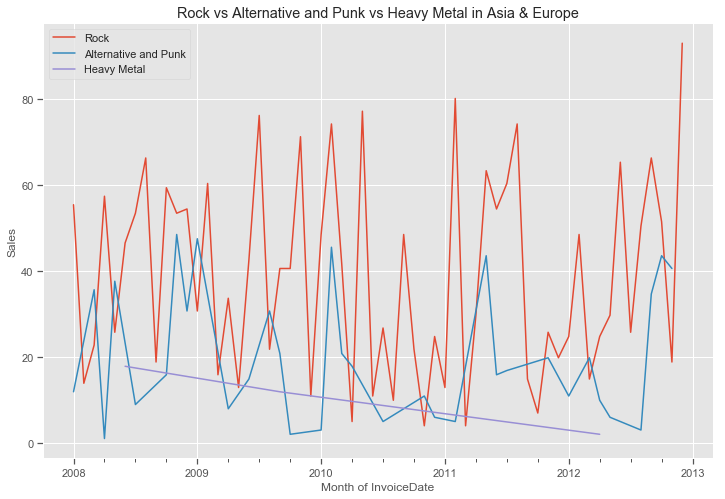

In [92]:
# draw the 'Rock vs Alternative and Punk vs Heavy Metal in Asia & Europe' plot.
rock_sales['Sales'].plot(legend = True, figsize = (12,8))
Alternative_Punk_sales['Sales'].plot(legend= True, figsize = (12,8))
Heavy_Metal_sales['Sales'].plot(legend= True, figsize = (12,8))
plt.legend(labels=['Rock','Alternative and Punk','Heavy Metal'],loc = 'best')
plt.xlabel('Month of InvoiceDate', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Rock vs Alternative and Punk vs Heavy Metal in Asia & Europe')
plt.show()

### 10. Treemap

In [84]:
# choose two regions 'Asia' and 'Europe'
df_EA=df[df['Region'].isin(['Europe', 'Asia'])].copy()
# sum the sales, and group by 'Country' and 'Region'
df_sales = df_EA.groupby(['Country','Region'])['Sales'].sum().reset_index()
df_sales.sort_values(by=['Sales'], ascending=False, inplace=True)
# Calculate the totel sales
total_sales = df_sales['Sales'].sum()
# Calculate the percent of the each sale from the totel sales
percent = round(df_sales['Sales']/ total_sales,4)
# add the percent to the df_sales dataframe
df_sales['Percent'] = percent
df_sales_percent = df_sales.drop(['Sales'], axis = 1)

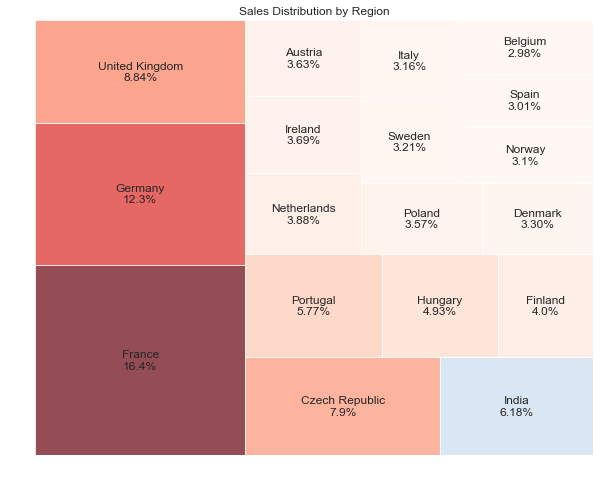

In [85]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as cls
import squarify # pip install squarify (algorithm for treemap)

import pandas as pd

# draw the plot 'Sales Distribution by Region'
plt.rcParams['figure.figsize'] = (10, 8)
mini = min(df_sales_percent['Percent'])
maxi = max(df_sales_percent['Percent'])
norm = cls.Normalize(vmin=mini, vmax=maxi)
colors = []
for index, row in df_sales_percent.iterrows():
    #print(row[['Region']].item())
    percent = row[['Percent']].item()
    #print(percent)
    if row[['Region']].item() == 'Europe':
        colors.append(cm.Reds(norm(percent)))
    else:
        colors.append(cm.Blues(norm(percent)))
#df = pd.DataFrame({'Precent':[16.47,12.35,8.84,7.90], 'Country':["France","Germany", "United Kingdom", "Czech Republic"] })

labels = []
for index, row in df_sales_percent.iterrows():
    percent = row[['Percent']].item()
    country = row[['Country']].item()
    labels.append("%s\n%.4s%%" % (country, percent * 100))
    
squarify.plot(sizes=df_sales['Sales'], label=labels, color=colors, alpha=.7)
#plt.legend(labels = df_sales['Country'])
#plt.legend(title="Country")
plt.title("Sales Distribution by Region")
plt.axis('off')
plt.show()

### 11. Pie Chart

In [86]:
#from collections import Counter
airbnb_1 = pd.read_csv('airbnb.csv')
room_type=airbnb_1.groupby('room_type').property_id.count()
room_type=room_type.reset_index()
room_type=room_type.rename(columns={'property_id':'number_Of_Listings'})

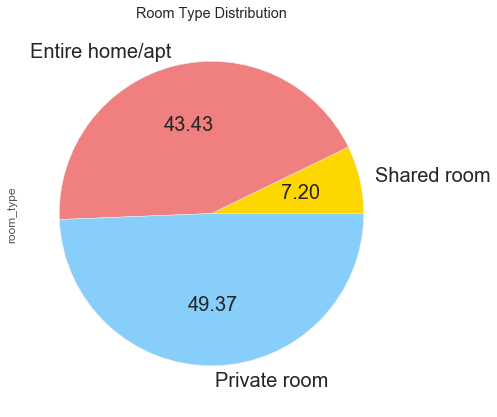

In [87]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

room = airbnb_1.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']

sliceColors = [ 'gold', 'lightcoral', 'lightskyblue']
room_df.plot.pie(y = 'room_type', 
                 colors=sliceColors, 
                 figsize=(7,7), 
                 fontsize = 20, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

### 12. Heatmap

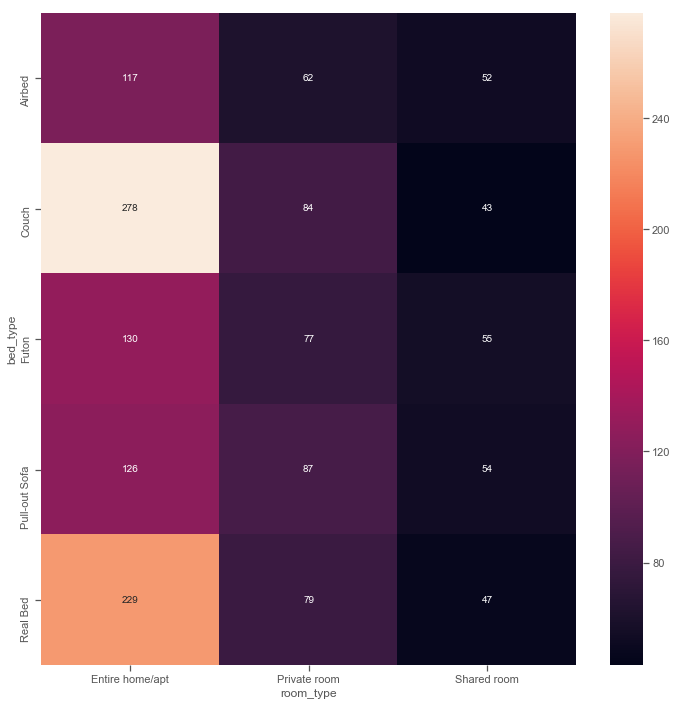

In [88]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(airbnb_1.groupby([
        'bed_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")